# Education Index vs Human Development (Webscraping and Stat Models)

## Packages:

In [13]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from os import path
from wordcloud import WordCloud, STOPWORDS
import scipy.stats
import numpy as np

In [11]:
pip install --upgrade scipy

     |████████████████████████████████| 30.7 MB 14.9 MB/s eta 0:00:01
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
Note: you may need to restart the kernel to use updated packages.


The following chunk of code utilizes packages BeautifulSoup, Requests, and Pandas to webscrape a table from Wikepedia. The table is about the educational and human Development indices around the world and is in row order by country rank. The variables within the dataframe will be:

Expected yearsof schooling

Mean years of schooling

Education Index Value

Rank (Education Index Rank)

HDI Rank (Human Development Rank)


In [99]:
url='https://en.wikipedia.org/wiki/Education_Index'
response=requests.get(url)
soup= BeautifulSoup(response.text,'html.parser')
table = soup.find('table', 'wikitable sortable mw-collapsible')
#print(table)
rows = table.find_all('tr')
columns= [v.text for v in rows[0].find_all('th')]
df = pd.DataFrame(columns=columns)
for i in range(1, len(rows)):
    tds=rows[i].find_all('td')
    
    if len(tds)== 4:
        values= [tds[0].text,tds[1].text,'',tds[2].text,tds[3].text]
    else:
        values=[td.text.replace('\n','') for td in tds]
    df = df.append(pd.Series(values, index=columns),ignore_index=True)
df

,Rank,Country,EducationIndex,Expected yearsof schooling,Mean years of schooling,HDI rank,Continent[6]\n
0,1,Australia,0.939,20.4,13.2,2,Oceania
1,2,Denmark,0.923,19.2,12.7,5,Europe
2,3,New Zealand,0.917,19.2,12.5,13,Oceania
3,4,Norway,0.916,17.7,12.7,1,Europe
4,5,Germany,0.914,17.1,13.2,4,Europe
...,...,...,...,...,...,...,...
183,184,South Sudan,0.297,4.9,4.8,181,Africa
184,185,Chad,0.280,7.3,2.3,186,Africa
185,186,Eritrea,0.267,5.0,3.9,179,Africa
186,187,Burkina Faso,0.262,7.7,1.4,185,Africa


The following chunk of code is  seasborn boxplot that dispalys the mean number of years in schooling between the seven different continents, this gives an idea of what the different nations Education Index might be and also give insights on the oppurtunity of each continents citizens

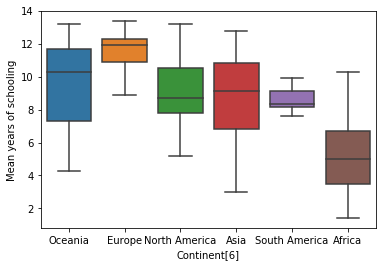

In [110]:
df["Mean years of schooling"] = pd.to_numeric(df["Mean years of schooling"])
ax = sns.boxplot(x="Continent[6]\n",y="Mean years of schooling", data=df)

The insights gained from the seaborn boxplot are that there is a vast difference in the average educational years per citizen across the seven continents. Africa is far behind withe their mean around 5 and their furthest outlier being around the mean of Oceania. South America is seocnd to last while Europe and Oceania are the top two.

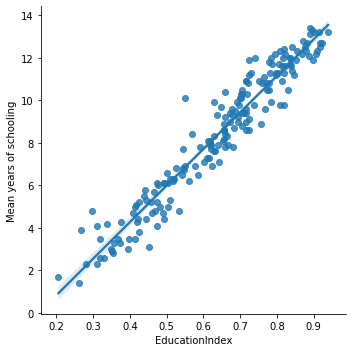

In [111]:
df["EducationIndex"] = pd.to_numeric(df["EducationIndex"])
sns.lmplot(x="EducationIndex", y="Mean years of schooling", data=df);

Next I ran a correlation calculation which returns a matrix that has the correlation value between all the variables. While all the values give inisght I was most interested in specifically the value between EducationIndex & Mean years of schooling since i could visually see that there was some sort of linear relationship between them via the linear regression graph above.

Indeed there was a very good indication from the correlation value that the two variables are strongly linearly related as their correlation value comes out to 0.965157 very close to a perfect linear relationship of 1.0

In [112]:
correlnon=df.corr()
correlnon

,EducationIndex,Mean years of schooling,HDI rank
EducationIndex,1.000000,0.965157,-0.940836
Mean years of schooling,0.965157,1.000000,-0.889227
HDI rank,-0.940836,-0.889227,1.000000


In [106]:
mean_df=df['EducationIndex'].mean()
std_df=np.std(df.EducationIndex)

0.6400372340425531

With this insight we can assume that the Educationindex vs Continent would have a very similar distribution as shown in the Mean years of schooling vs Continent boxplot.

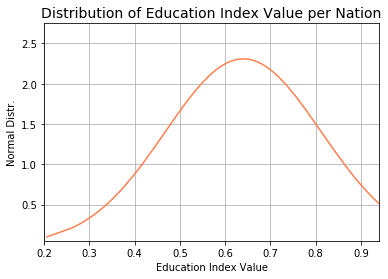

In [35]:
x =df['EducationIndex']
y = scipy.stats.norm.pdf(x,mean_df,std_df)
plt.plot(x,y, color='coral')
plt.grid()
plt.xlim(0.2,0.94)
plt.ylim(0.05,2.75)
plt.title('Distribution of Education Index Value per Nation',fontsize=14)
plt.xlabel('Education Index Value')
plt.ylabel('Normal Distr.')
plt.show()

Now in order to more efficietly run a t-test on the HDI Rank i will turn the rank into a relative value between 0 and 1 where 1 is the highest HDI Rank and 0 is the lowest possible. (Australia will have highest value and Niger will have lowest value. 

The purpose of this is to split the countries from bottom 50% and top 50% based on their Education Index (from nthe normal distribution graph) then run a t-test on the two groups HDI Rank. The reason for this is because higher value throughout the rest of the data set (besides rank) is a positive indicator, so the HDI rank from 1-187 would of been confusing to use for me.

In [116]:
df["HDI rank"] = pd.to_numeric(df["HDI rank"])
df["HDI value"] = (1-(df["HDI rank"]/188))
df

,Rank,Country,EducationIndex,Expected yearsof schooling,Mean years of schooling,HDI rank,Continent[6]\n,HDI value
0,1,Australia,0.939,20.4,13.2,2,Oceania,0.989362
1,2,Denmark,0.923,19.2,12.7,5,Europe,0.973404
2,3,New Zealand,0.917,19.2,12.5,13,Oceania,0.930851
3,4,Norway,0.916,17.7,12.7,1,Europe,0.994681
4,5,Germany,0.914,17.1,13.2,4,Europe,0.978723
...,...,...,...,...,...,...,...,...
183,184,South Sudan,0.297,4.9,4.8,181,Africa,0.037234
184,185,Chad,0.280,7.3,2.3,186,Africa,0.010638
185,186,Eritrea,0.267,5.0,3.9,179,Africa,0.047872
186,187,Burkina Faso,0.262,7.7,1.4,185,Africa,0.015957


This chunk of code is going to add another column which will be a conditional value either "over" or "under" depednent if the EducationIndex is over or under the mean of .64

In [119]:
def f(row):
    if row['EducationIndex']>=.64:
        val = "over"
    else:
        val = "under"
    return val
df['OverUnder'] = df.apply(f, axis=1)
df

,Rank,Country,EducationIndex,Expected yearsof schooling,Mean years of schooling,HDI rank,Continent[6]\n,HDI value,OverUnder
0,1,Australia,0.939,20.4,13.2,2,Oceania,0.989362,over
1,2,Denmark,0.923,19.2,12.7,5,Europe,0.973404,over
2,3,New Zealand,0.917,19.2,12.5,13,Oceania,0.930851,over
3,4,Norway,0.916,17.7,12.7,1,Europe,0.994681,over
4,5,Germany,0.914,17.1,13.2,4,Europe,0.978723,over
...,...,...,...,...,...,...,...,...,...
183,184,South Sudan,0.297,4.9,4.8,181,Africa,0.037234,under
184,185,Chad,0.280,7.3,2.3,186,Africa,0.010638,under
185,186,Eritrea,0.267,5.0,3.9,179,Africa,0.047872,under
186,187,Burkina Faso,0.262,7.7,1.4,185,Africa,0.015957,under




This graph is a boxplot showing the distribution of the over and under assigned countires and their correspoding HDI value (Human Development Index)

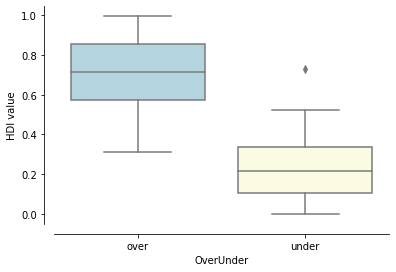

In [126]:
sns.boxplot(x = "OverUnder", y = "HDI value", palette = ["lightblue","lightyellow"], data = df)
sns.despine(offset = 10)

I will be running the same t-test shown in the example to see the difference between 

(i) &nbsp;  H<sub>o</sub>: $\mu$<sub>1</sub> = $\mu$<sub>2</sub> <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;    H<sub>a</sub>: $\mu$<sub>1</sub> < $\mu$<sub>2</sub>

(ii) Find the test statistic:

t<sub>obs</sub> = $\frac{(\bar{x}_1 - \bar{x}_2)} {√( \frac{s1^2}{n_1} + \frac{s2^2}{n_2} )}$

In [130]:
x_un=df.groupby("OverUnder")["HDI value"].mean()["under"]
x_ov=df.groupby("OverUnder")["HDI value"].mean()["over"]
print(x_un,x_ov)

s_un=df.groupby("OverUnder")["HDI value"].std()["under"]
s_ov=df.groupby("OverUnder")["HDI value"].std()["over"]
print(s_un,s_ov)

n_un=df.groupby("OverUnder")["HDI value"].count()["under"]
n_ov=df.groupby("OverUnder")["HDI value"].count()["over"]
print(n_un,n_ov)

0.22963155163466517 0.7061421116017664
0.15028518866886592 0.17863354009271476
82 106


In [137]:
tv=(x_un-x_ov)/(s_un**2/n_un+s_ov**2/n_ov)**(1/2)
print(tv)

degree=(s_un**2/n_un+s_ov**2/n_ov)**2/((s_un**2/(n_un))**2/(n_un-1)+(s_ov**2/(n_ov))**2/(n_ov-1))
print(degree)

t_dist=scipy.stats.t(degree)

pv=t_dist.cdf(tv)
print(pv)

-19.846480329053616
184.65538882160965
5.724927623482062e-48


The P-Value is less than.05 therefore we can reject the null hypothesis, meaning that the reuslt is statistically significant.

This means that the Educational Index has a high influence on the General Human Development of citizens within the country.